# Global Air Quality Data EDA
## 📝 Problem Statement

Air pollution is one of the most pressing global environmental challenges, directly impacting human 
health,  ecosystems,  and  climate.  Monitoring  air  quality  helps  policymakers  and  environmental 
agencies make informed decisions to control emissions and protect public health. In this project, 
we  will  explore  global  air  quality  datasets  to  identify  pollution  trends,  seasonal  variations, and 
city/country comparisons. 

In this project, we will perform **Exploratory Data Analysis (EDA)** on a real-world dataset related to air quality. Our goal is to:
- Understand the data distribution and detect missing or incorrect values.
- Explore feature relationships with the outcome variable (pollution levels).
- Identify trends or indicators that may help predict air quality issues.

### 📁 Dataset Link

[🔗 Global Air Quality Dataset - Kaggle](https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india)


## EDA Questions:
1. Which cities have the highest average AQI (Air Quality Index)?
2. How does AQI vary by month or season?
3. What pollutants are recorded, and what are their average levels?
4. Which city has the cleanest air on average?
5. Are there any missing data patterns in the dataset?
6. Which cities consistently exceed safe pollution limits?
7. How do pollution levels vary between weekdays and weekends?

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("city_day.csv")

In [5]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
print("Shape of the dataset:", df.shape)
print("Column names:", df.columns)
print("Info summary of the dataset:")
df.info()

Shape of the dataset: (29531, 16)
Column names: Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')
Info summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-nul

In [7]:
# 5. Are there any missing data patterns in the dataset?
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [8]:
df = pd.read_csv('city_day.csv')
print(df.isnull().sum())
print(df.shape)
df.dropna(inplace=True)

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64
(29531, 16)


In [9]:
# 1. Which cities have the highest average AQI (Air Quality Index)?
avg_aqi = df.groupby('City')['AQI'].mean().sort_values(ascending=False)
print(avg_aqi.head(10))

City
Delhi            251.832516
Patna            169.356021
Amritsar         129.169811
Gurugram         127.966387
Visakhapatnam    116.954023
Kolkata          113.979695
Hyderabad        104.864648
Amaravati        101.500000
Chandigarh        93.241877
Name: AQI, dtype: float64


In [10]:
# 2. How does AQI vary by month or season?
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
monthly_aqi = df.groupby('Month')['AQI'].mean().sort_index()
print("Average AQI by Month:")
print(monthly_aqi)


Average AQI by Month:
Month
1     198.094637
2     162.938053
3     122.543614
4     117.777982
5     117.526863
6      96.854386
7      79.733696
8      75.471299
9      95.950777
10    167.366197
11    201.142077
12    188.319930
Name: AQI, dtype: float64


In [11]:
# 3. What pollutants are recorded, and what are their average levels?
df.groupby('City')[['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'CO']].mean().head()

,PM2.5,PM10,NO2,SO2,O3,CO
City,,,,,,
Amaravati,41.713220,81.809876,23.754613,15.021176,39.535217,0.611238
Amritsar,56.421509,119.936321,19.048176,9.388129,24.496635,0.730912
Chandigarh,39.489783,83.123466,12.031191,10.126173,19.838051,0.619061
Delhi,117.134755,223.165678,44.428742,13.948154,44.382949,2.185964
Gurugram,49.541008,113.500672,17.376891,10.596975,60.893193,0.766134


In [12]:
# 4. Which city has the cleanest air on average?
cleanest_city = df.groupby('City')[['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'CO']].mean().idxmin()
print("City with the cleanest air on average:")
print(cleanest_city)

City with the cleanest air on average:
PM2.5    Chandigarh
PM10      Amaravati
NO2      Chandigarh
SO2         Kolkata
O3       Chandigarh
CO        Hyderabad
dtype: object


In [13]:
# 6. Which cities consistently exceed safe pollution limits?
safe_limits = {
    'PM2.5': 35,
    'PM10': 50,
    'NO2': 40,
    'SO2': 20,
    'O3': 180,
    'CO': 4
}

exceeding_cities = df[df[['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'CO']].gt(pd.Series(safe_limits)).any(axis=1)].groupby('City').filter(lambda x: x.shape[0] > 0)

print("Cities consistently exceeding safe pollution limits:")
print(exceeding_cities['City'].unique())

Cities consistently exceeding safe pollution limits:
['Amaravati' 'Amritsar' 'Chandigarh' 'Delhi' 'Gurugram' 'Hyderabad'
 'Kolkata' 'Patna' 'Visakhapatnam']


In [14]:
# 7. How do pollution levels vary between weekdays and weekends?

# Add a 'DayOfWeek' column (0=Monday, ..., 6=Sunday)
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Create a 'Weekend' column: True for Saturday/Sunday, False otherwise
df['Weekend'] = df['DayOfWeek'].isin([5, 6])

# Compare average AQI for weekdays vs weekends
weekday_aqi = df[df['Weekend'] == False]['AQI'].mean()
weekend_aqi = df[df['Weekend'] == True]['AQI'].mean()

print(f"Average AQI on weekdays: {weekday_aqi:.2f}")
print(f"Average AQI on weekends: {weekend_aqi:.2f}")


Average AQI on weekdays: 141.23
Average AQI on weekends: 138.68


## Visualization Questions:  
1. Bar chart of Top 10 most polluted cities by AQI. 
2. Line plot showing monthly AQI trends for selected cities.
3. Heatmap showing correlation between pollutants (PM2.5, PM10, NO2, SO2, 03, CO).
4. Seasonal comparison plot of average AQI levels.
5. Stacked bar chart of pollutant contributions in different cities.
6. Map visualization showing geographic distribution of AQI values.
7. Boxplot comparing AQI across major cities.

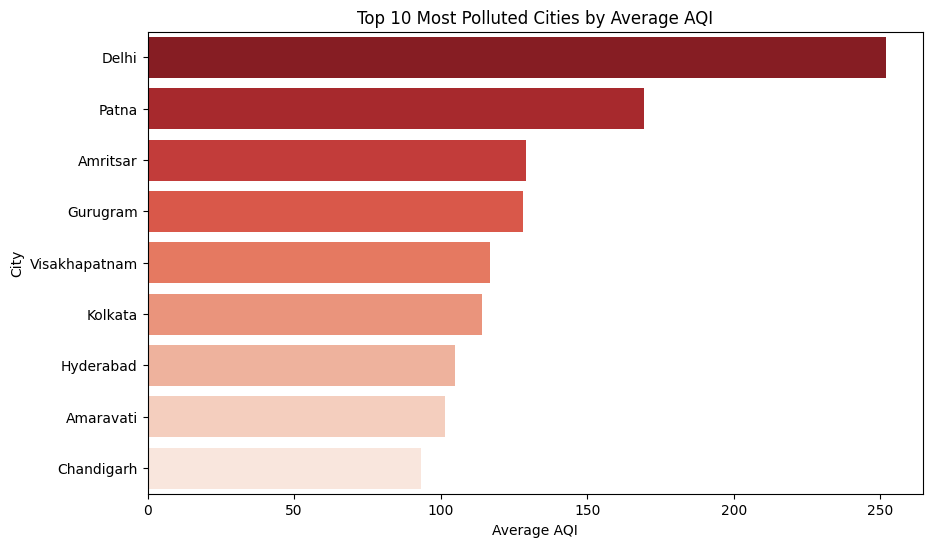

In [15]:
# 1. Bar chart of Top 10 most polluted cities by AQI. 
top_10_cities = avg_aqi.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_cities.values, y=top_10_cities.index,  hue=top_10_cities.index, palette='Reds_r', legend=False)
plt.xlabel('Average AQI')
plt.ylabel('City')
plt.title('Top 10 Most Polluted Cities by Average AQI')
plt.show()

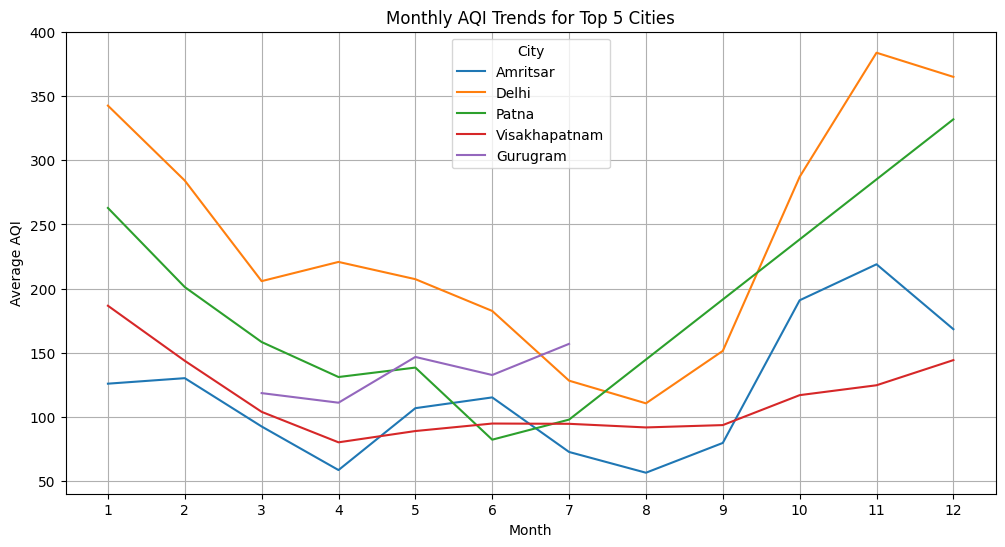

In [17]:
# Select top 5 cities with highest average AQI for visualization
top_cities = df.groupby('City')['AQI'].mean().sort_values(ascending=False).head(5).index.tolist()

# Filter the dataframe to include only the top cities
df_top_cities = df[df['City'].isin(top_cities)]

# Group by month and city to get the average AQI
monthly_aqi_cities = df_top_cities.groupby(['Month', 'City'])['AQI'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_aqi_cities, x='Month', y='AQI', hue='City')
plt.title('Monthly AQI Trends for Top 5 Cities')
plt.xlabel('Month')
plt.ylabel('Average AQI')
plt.xticks(range(1, 13)) # Set x-axis ticks to represent months 1-12
plt.grid(True)
plt.show()

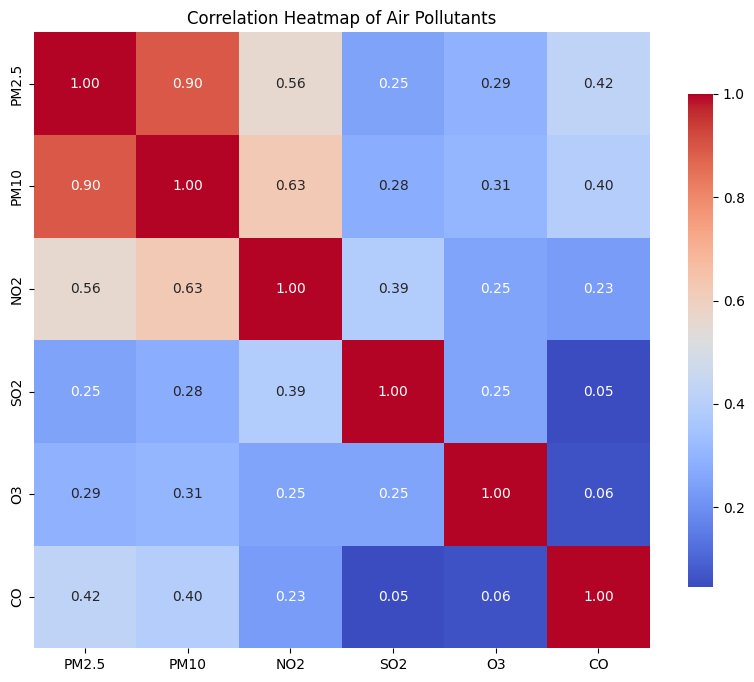

In [18]:
# 3. Heatmap showing correlation between pollutants (PM2.5, PM10, NO2, SO2, 03, CO).

# Select relevant columns for correlation analysis
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'O3', 'CO']
correlation_data = df[pollutants]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Air Pollutants')
plt.show()

C:\Users\Emad\AppData\Local\Temp\ipykernel_8044\3925016797.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_aqi.index, y=seasonal_aqi.values, palette='coolwarm')


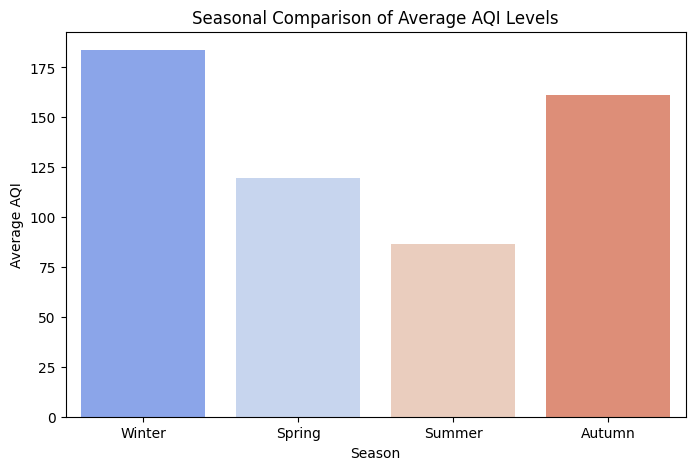

In [19]:
# 4. Seasonal comparison plot of average AQI levels.

# Define seasons by month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Month'] = df['Date'].dt.month
df['Season'] = df['Month'].apply(get_season)

# Calculate average AQI per season
seasonal_aqi = df.groupby('Season')['AQI'].mean().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=seasonal_aqi.index, y=seasonal_aqi.values, palette='coolwarm')
plt.title('Seasonal Comparison of Average AQI Levels')
plt.xlabel('Season')
plt.ylabel('Average AQI')
plt.show()

<Figure size 1500x800 with 0 Axes>

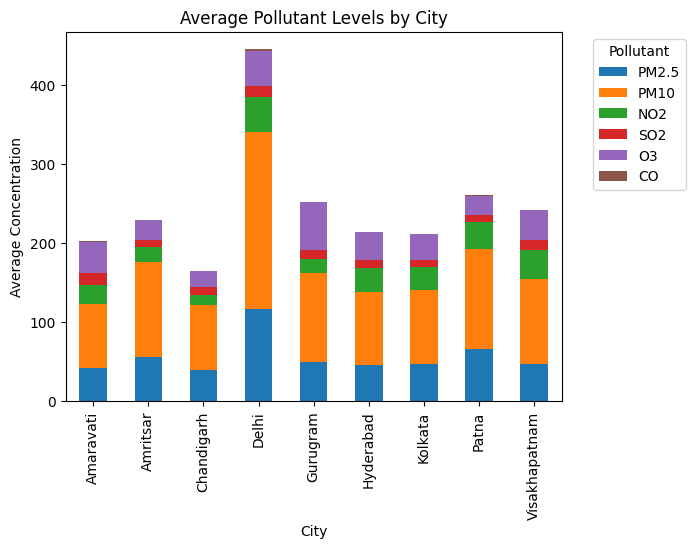

In [25]:
# 5. Stacked bar chart of pollutant contributions in different cities.

# Calculate the average of each pollutant for each city

avg_pollutants = df.groupby('City')[pollutants].mean()

plt.figure(figsize=(15, 8))
avg_pollutants.plot(kind='bar', stacked=True)
plt.title('Average Pollutant Levels by City')
plt.xlabel('City')
plt.ylabel('Average Concentration')
plt.legend(title='Pollutant', bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
import folium

city_coords = {
    "Delhi": [28.7041, 77.1025],
    "Mumbai": [19.0760, 72.8777],
    "Kolkata": [22.5726, 88.3639],
    "Bangalore": [12.9716, 77.5946],
    "Hyderabad": [17.3850, 78.4867],
}

# Filter data for major cities
major_cities = list(city_coords.keys())
df_major_cities = df[df['City'].isin(major_cities)].copy()

# Calculate average AQI for each city
city_aqi = df_major_cities.groupby("City")['AQI'].mean().reset_index()

# Create base map (India-centered example)
m = folium.Map(location=[22.9734, 78.6569], zoom_start=5)

# Add circle markers for each city
for _, row in city_aqi.iterrows():
    city = row['City']
    aqi = row['AQI']
    if city in city_coords:  # only plot if coords available
        folium.CircleMarker(
            location=city_coords[city],
            radius=7,
            popup=f"{city}: {aqi:.2f}",
            color="red" if aqi > 200 else "orange" if aqi > 100 else "green",
            fill=True,
            fill_opacity=0.7
        ).add_to(m)

# Save map to HTML file
m.save("aqi_map.html")

The following cities are missing from the dataset: {'Chennai', 'Ahmedabad', 'Pune', 'Mumbai', 'Bangalore'}


In [40]:
major_cities

['Delhi',
 'Mumbai',
 'Kolkata',
 'Chennai',
 'Bangalore',
 'Hyderabad',
 'Pune',
 'Ahmedabad']

C:\Users\Emad\AppData\Local\Temp\ipykernel_8044\3772790800.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='City', y='AQI', data=df_major_cities, palette='Set2')


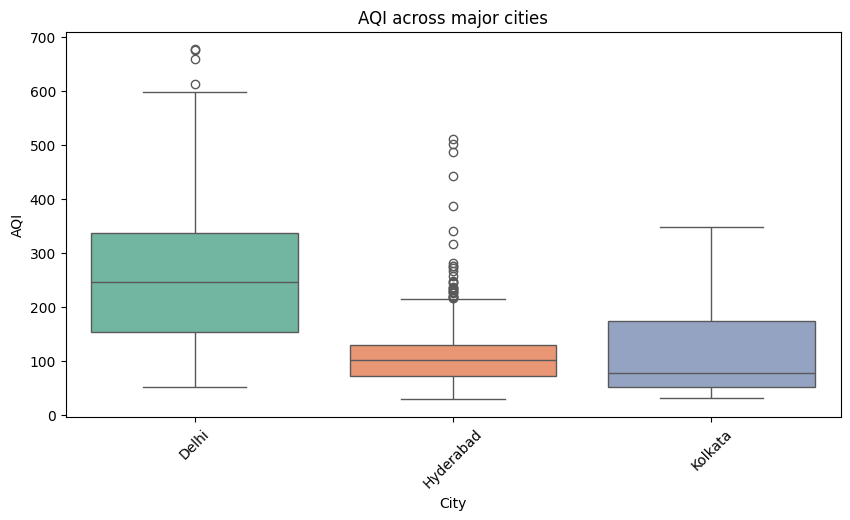

In [ ]:
# 7. Boxplot comparing AQI across major cities.
major_cities = ['Delhi', 'Mumbai', 'Kolkata', 'Chennai', 'Ahmedabad', 'Bangalore', 'Hyderabad', 'Pune']
df_major_cities = df[df['City'].isin(major_cities)]

plt.figure(figsize=(10,5))
sns.boxplot(x='City', y='AQI', data=df_major_cities, palette='Set2')
plt.xlabel("City")
plt.ylabel("AQI")
plt.title("AQI across major cities")
plt.xticks(rotation=45)
plt.show()